# **Report on Credit Default Risk Assessment Model**

## ***Introduction***

<br><br>

## ***Imports***

In [1]:
import os

%matplotlib inline
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

<br><br>

## ***Data Reading & Data Splitting***

Dataset retrieved from: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset

In [2]:
credit_df = pd.read_csv("data/UCI_Credit_Card.csv")
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<br>

### *Feature Reference*
- **ID**: ID of each client
- **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- **SEX**: Gender (1=male, 2=female)
- **EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- **MARRIAGE**: Marital status (1=married, 2=single, 3=others)
- **AGE**: Age in years
- **PAY_0**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- **PAY_2**: Repayment status in August, 2005 (scale same as above)
- **PAY_3**: Repayment status in July, 2005 (scale same as above)
- **PAY_4**: Repayment status in June, 2005 (scale same as above)
- **PAY_5**: Repayment status in May, 2005 (scale same as above)
- **PAY_6**: Repayment status in April, 2005 (scale same as above)
- **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)
- **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)
- **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)
- **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)
- **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)
- **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)
- **PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)
- **PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)
- **PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)
- **PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)
- **PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)
- **PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)
- **default.payment.next.month**: Default payment (1=yes, 0=no)

<br>

In [3]:
train_df, test_df = train_test_split(credit_df, test_size = 0.3, random_state = 123)
train_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
16395,16396,320000.0,2,1,2,36,0,0,0,0,...,19370.0,10155.0,3788.0,5000.0,5018.0,1000.0,3000.0,0.0,7013.0,0
21448,21449,440000.0,2,1,2,30,-1,-1,-1,0,...,171244.0,150897.0,117870.0,612.0,87426.0,130007.0,3018.0,15000.0,51663.0,0
20034,20035,160000.0,2,3,1,44,-2,-2,-2,-2,...,-18.0,-18.0,-18.0,0.0,0.0,0.0,0.0,0.0,0.0,0
25755,25756,120000.0,2,2,1,30,0,0,0,0,...,103058.0,71095.0,47379.0,3706.0,5502.0,4204.0,3017.0,2005.0,1702.0,0
1438,1439,50000.0,1,2,2,54,1,2,0,0,...,27585.0,27910.0,27380.0,0.0,1400.0,1200.0,1500.0,1000.0,1500.0,0


<br>

### *Key Observations from Initial Dataset Review*

The dataset exclusively comprises numerical representations for all its features, thereby streamlining the preprocessing phase. Nevertheless, there exists heterogeneity among the scales across distinct features, thereby underscoring the necessity for scaling to mitigate this disparity. Furthermore, specific attributes, inclusive of the ID column, demonstrate insignificance in the context of our analysis, rendering them suitable for exclusion from the dataset.

Upon meticulous examination of the feature descriptions, it becomes discernible that certain columns, albeit initially suggestive of numerical values, inherently denote categorical attributes. Pertaining to the target variable, it encompasses binary values, indicating the potential appropriateness of conducting classification procedures.

<br><br>

## ***Preliminary Exploratory Data Analysis (EDA)***

### Summary Statistics

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 16395 to 19966
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          21000 non-null  int64  
 1   LIMIT_BAL                   21000 non-null  float64
 2   SEX                         21000 non-null  int64  
 3   EDUCATION                   21000 non-null  int64  
 4   MARRIAGE                    21000 non-null  int64  
 5   AGE                         21000 non-null  int64  
 6   PAY_0                       21000 non-null  int64  
 7   PAY_2                       21000 non-null  int64  
 8   PAY_3                       21000 non-null  int64  
 9   PAY_4                       21000 non-null  int64  
 10  PAY_5                       21000 non-null  int64  
 11  PAY_6                       21000 non-null  int64  
 12  BILL_AMT1                   21000 non-null  float64
 13  BILL_AMT2                  

#### *Comment*

First off, none of the features exhibit missing values, alleviating the need for imputation. All values within the dataset are appropriately represented as numeric data types, such as int64 or float64. However, exercising caution is important when interpreting certain features, namely 'SEX', 'MARRIAGE', 'EDUCATION', and 'PAY_0' ~ 'PAY_6' as they represent categorical disguised as numeric values.

<br>

In [5]:
train_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14962.348238,167880.651429,1.600762,1.852143,1.554000,35.500810,-0.015429,-0.137095,-0.171619,-0.225238,...,43486.610905,40428.518333,38767.202667,5673.585143,5.895027e+03,5311.432286,4774.021381,4751.850095,5237.762190,0.223238
std,8650.734050,130202.682167,0.489753,0.792961,0.521675,9.212644,1.120465,1.194506,1.196123,1.168556,...,64843.303993,61187.200817,59587.689549,17033.241454,2.180143e+04,18377.997079,15434.136142,15228.193125,18116.846563,0.416427
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-50616.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7498.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2293.750000,1739.500000,1215.750000,1000.000000,8.200000e+02,390.000000,266.000000,234.000000,110.750000,0.000000
50%,14960.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19102.500000,18083.000000,16854.500000,2100.000000,2.007000e+03,1809.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22458.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54763.250000,50491.000000,49253.750000,5007.250000,5.000000e+03,4628.500000,4021.250000,4016.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


#### *Comment*

This collection of statistical summaries provides valuable insights. The noticeable variations in mean values across different features underscore significant differences in their average magnitudes. Similarly, the observed disparities between the maximum and minimum values further highlight the need for scaling. These observations collectively reinforce the necessity of implementing appropriate scaling techniques to ensure fair and accurate comparisons among the features.

<br>

### Visual Exploration of the Features

In [6]:
# Assigning the features based on their data type

numeric_cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
drop_cols = ['ID']

#### Histogram

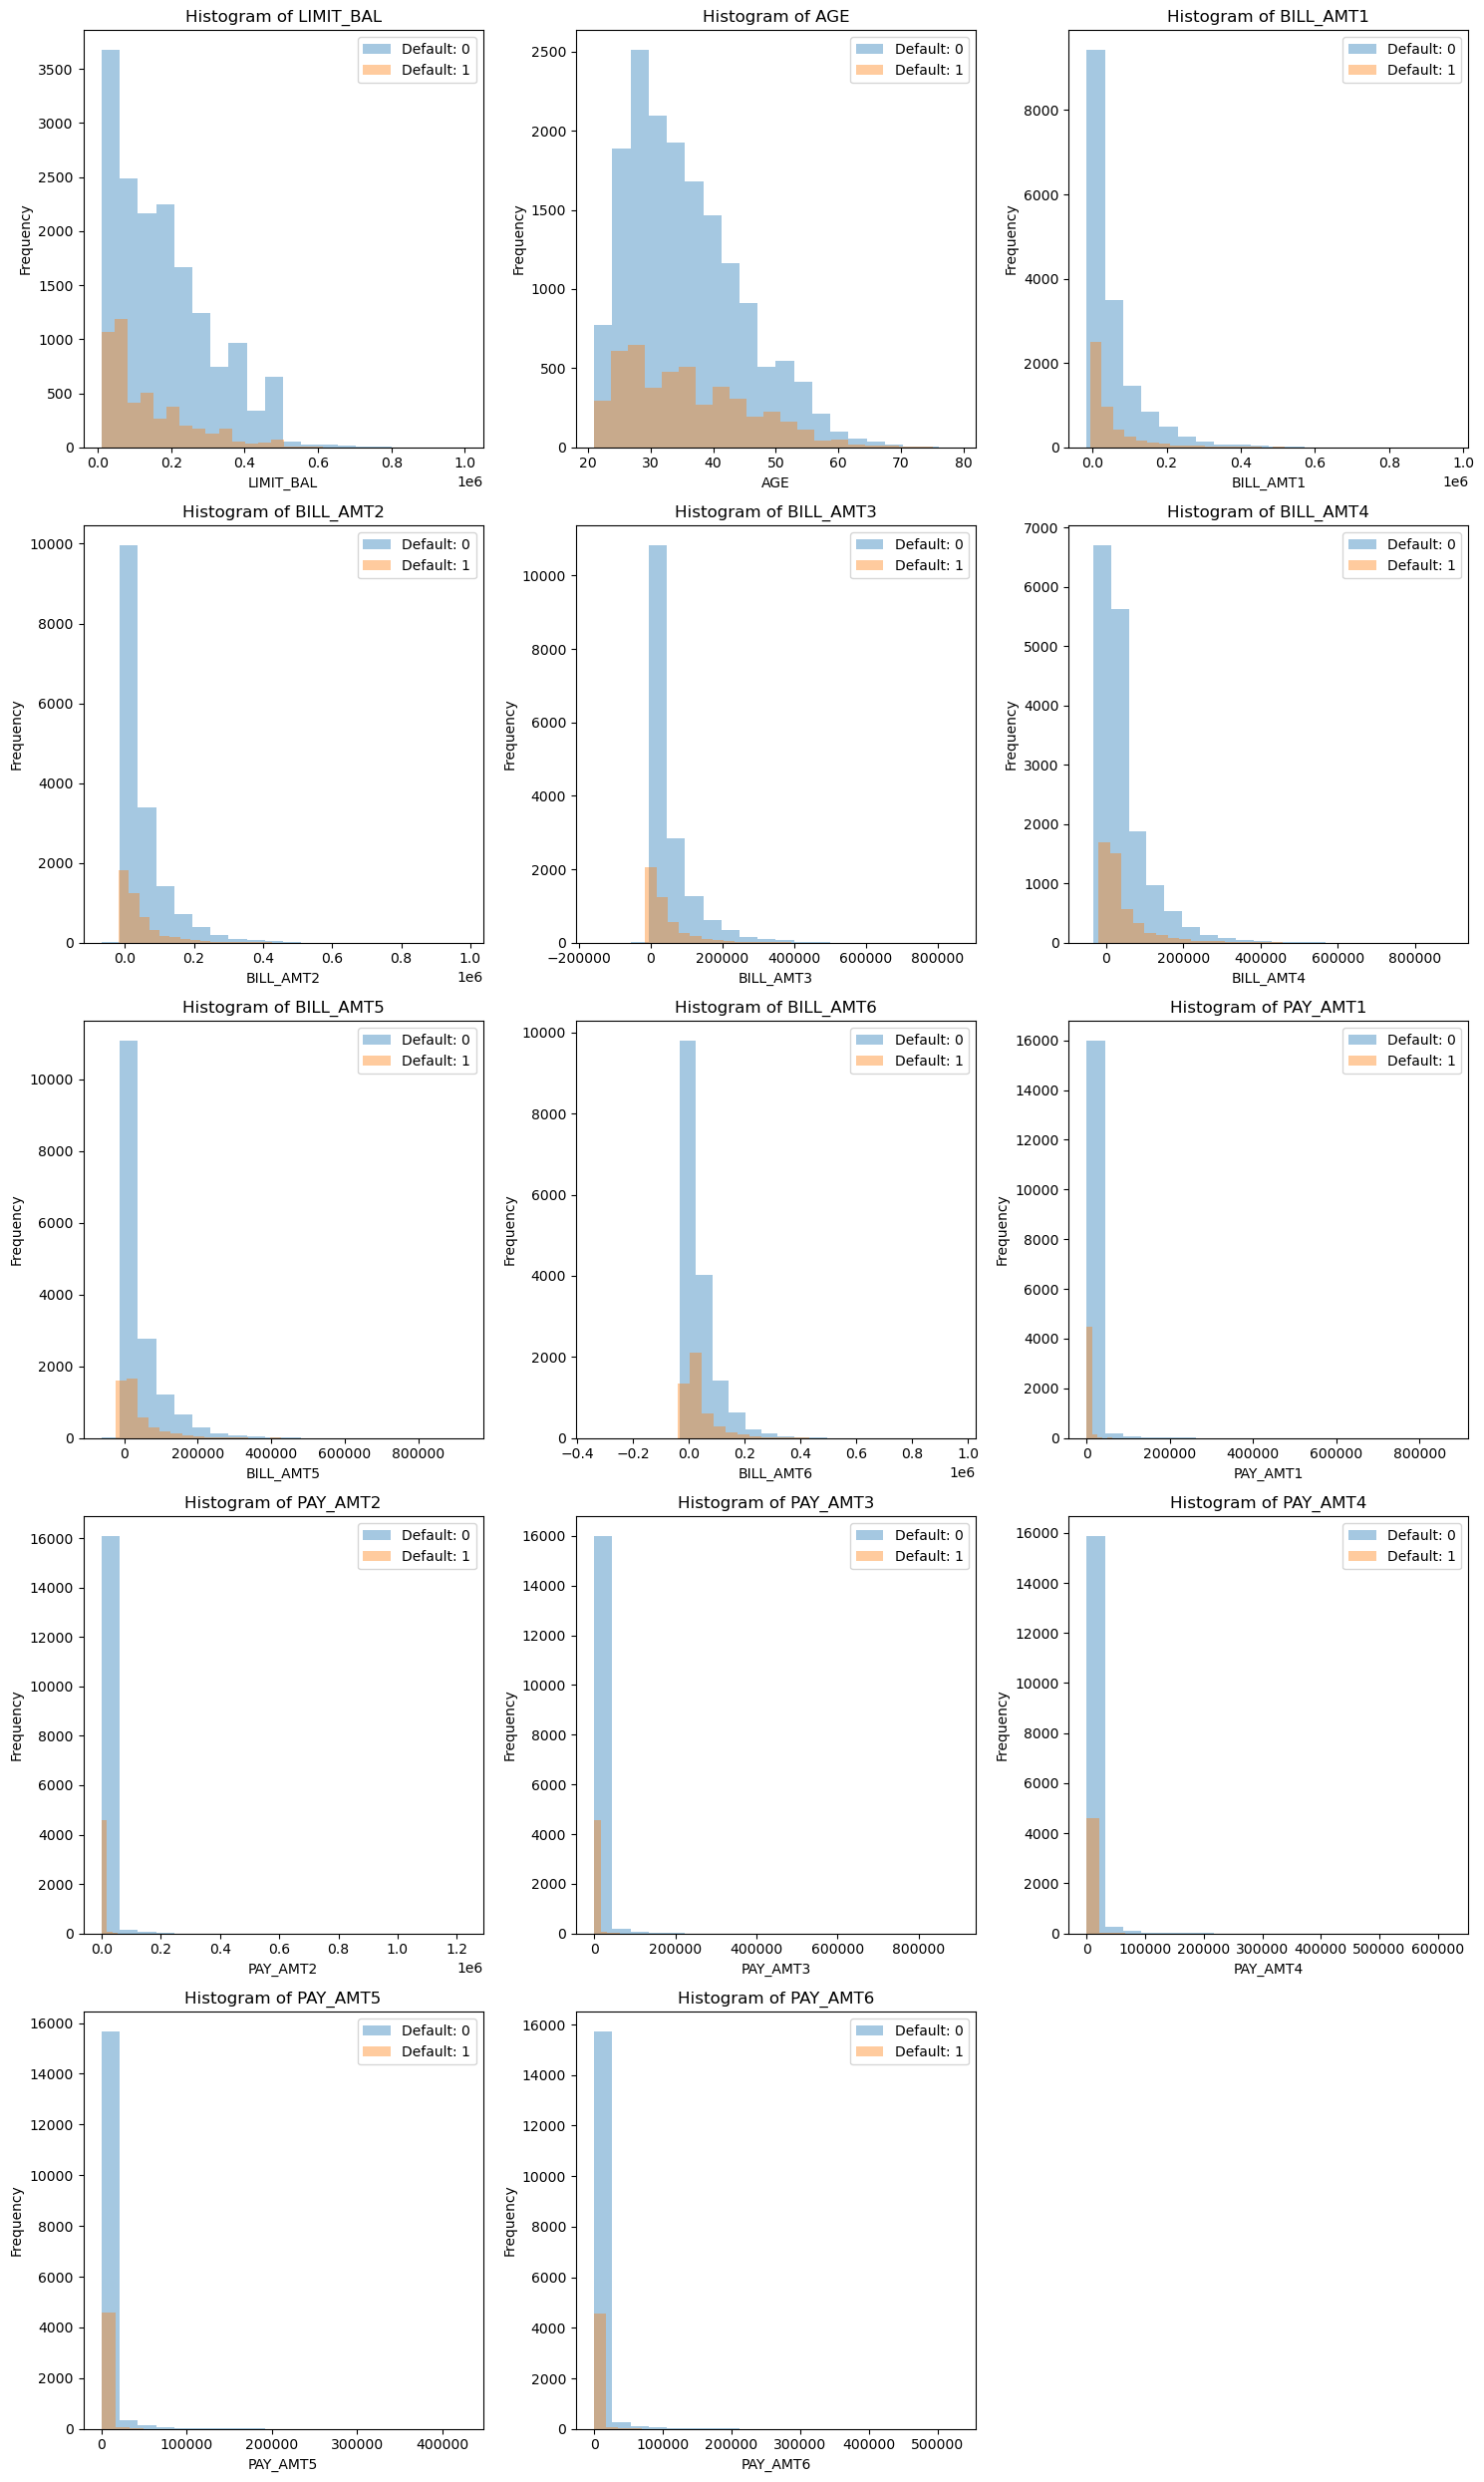

In [7]:
num_cols_per_row = 3
num_rows = int(np.ceil(len(numeric_cols) / num_cols_per_row))

fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(15, 5*num_rows))

for idx, feat in enumerate(numeric_cols):
    row_idx = idx // num_cols_per_row
    col_idx = idx % num_cols_per_row
    
    if num_rows == 1:
        ax = axes[col_idx]  
    else:
        ax = axes[row_idx, col_idx]
    
    for label, group in train_df.groupby("default.payment.next.month"):
        group[feat].plot.hist(ax=ax, bins=20, alpha=0.4, legend=True, label=f'Default: {label}')
    
    ax.set_xlabel(feat)
    ax.set_title("Histogram of " + feat)
    ax.legend()

if len(numeric_cols) < (num_rows * num_cols_per_row):
    for idx in range(len(numeric_cols), num_rows * num_cols_per_row):
        fig.delaxes(axes.flatten()[idx])

# Adjust layout
plt.tight_layout()
plt.show()

#### *Comment*

The histogram analysis reveals several noteworthy patterns within the dataset:

1. **LIMIT_BAL** (Amount of given credit): A clear relationship emerges between credit limit and default risk, with lower credit limits exhibiting higher default probabilities. This observation aligns with intuitive expectations.

2. **AGE**: A distinct trend emerges, indicating that younger individuals face a higher default risk, particularly within the age range of 20 to 30 years.

3. **BILL_AMT1 ~ 6** (Amount of bill statement in a specific month): An intriguing observation surfaces, indicating a negative correlation between bill statement amounts and the occurrence of defaults. In other words, lower bill statement amounts appear to be associated with a higher likelihood of default.

4. **PAY_AMT1 ~ 6** (Amount of previous payment in a specific month): Notably, the majority of values are concentrated at zero, suggesting that a significant number of defaults occur when the previous payment amount is approximately zero.

These findings provide valuable insights into the relationships between various variables and the probability of default, paving the way for further analysis and modeling.

<br>

#### Barplot

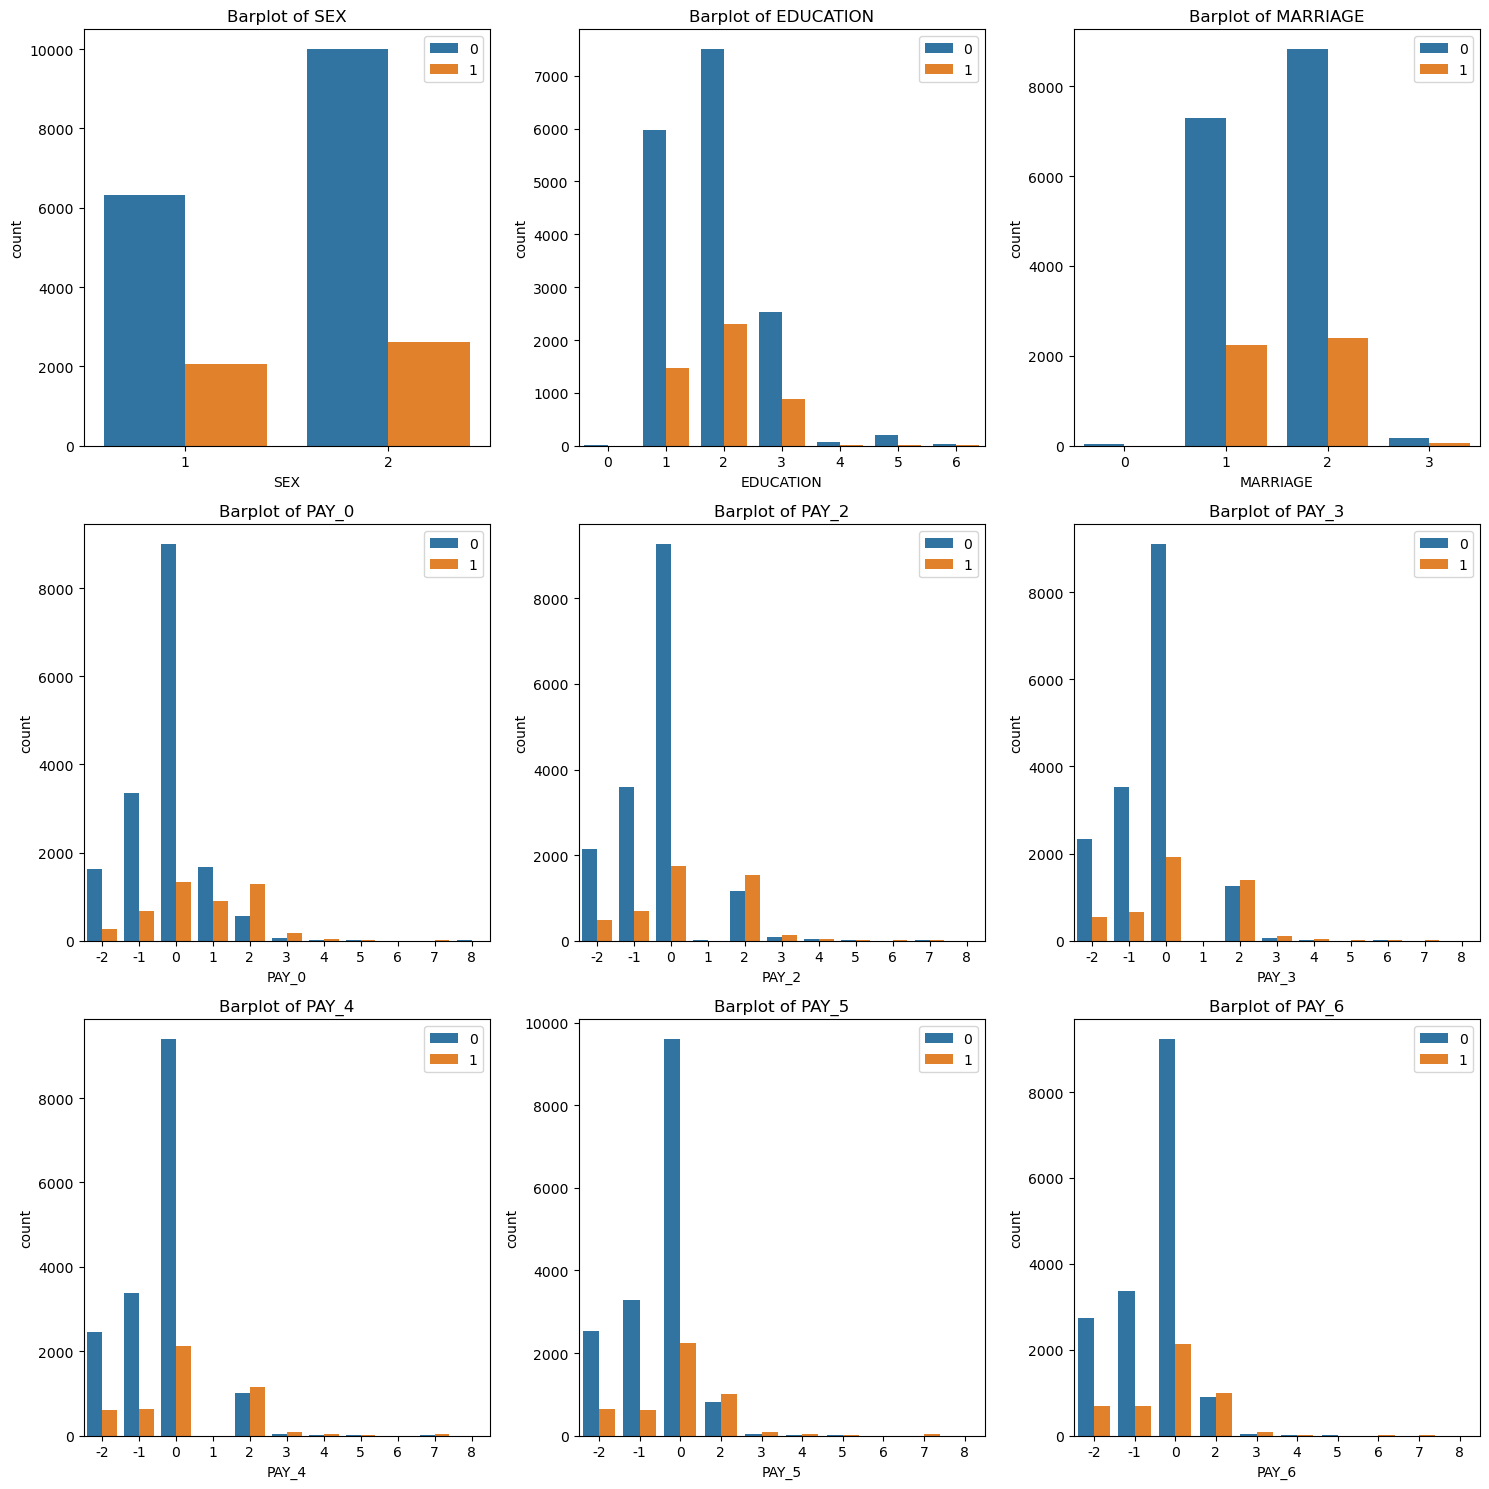

In [8]:
import seaborn as sns

num_cols_per_row = 3
num_rows = int(np.ceil(len(categorical_cols) / num_cols_per_row))

fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(15, 5*num_rows))

for idx, feat in enumerate(categorical_cols):
    row_idx = idx // num_cols_per_row
    col_idx = idx % num_cols_per_row
    
    if num_rows == 1:
        ax = axes[col_idx]
    else:
        ax = axes[row_idx, col_idx]
    
    sns.countplot(x=feat, hue='default.payment.next.month', data=train_df, ax=ax)
    ax.set_xlabel(feat)
    ax.set_title("Barplot of " + feat)
    ax.legend()

if len(categorical_cols) < (num_rows * num_cols_per_row):
    for idx in range(len(categorical_cols), num_rows * num_cols_per_row):
        fig.delaxes(axes.flatten()[idx])

# Adjust layout
plt.tight_layout()
plt.show()

#### *Comment*

The categorical features and target variable (0 = non-default, 1 = default) have been effectively visualized, leading to insightful observations:

1. **SEX** (Gender): The analysis demonstrates a higher representation of females among the non-default cases compared to males. However, the default counts remain approximately equal for both genders.

2. **EDUCATION**: Individuals with a university degree exhibit the highest number of default cases, while also constituting the majority in the non-default group.

3. **MARRIAGE** (Marital Status): An intriguing observation is that the number of non-default cases is higher among single individuals when compared to married individuals, despite the default counts being nearly identical in both groups.

4. **PAY_0 ~ PAY_6** (Payment History): The data indicates that the majority of cases, across both default and non-default groups, have the highest frequency at the value of 0, indicating no payment delay.

<br>

### Class Imbalance Check

In [9]:
train_df['default.payment.next.month'].value_counts()

0    16312
1     4688
Name: default.payment.next.month, dtype: int64

<br>

### *Overall Summary of EDA*

Through the process of exploratory data analysis (EDA), we have uncovered the following valuable insights within the dataset: 
- The need for tailored data transformations prior to the application of machine learning models has become apparent. 
- Notably, visualizations have unveiled compelling correlations between feature types and target classes. 
- Recognizing the prevalent class imbalance that may impact these insights is essential. 

However, the EDA remains a vital tool for extracting meaningful and substantial insights from the dataset.

### *Metric for Assessment*

Note that the data exhibits a class imbalance, with approximately 78% belonging to class 0 (non-default) and 22% belonging to class 1 (default). Nevertheless, I consider this imbalance to be within an acceptable range.

However, when dealing with class imbalance, relying solely on accuracy as an assessment metric can be misleading. Metrics like recall and precision offer more accurate insights into the model's performance. Here, the f1 score stands as the preferred metric for analysis due to its balanced consideration of both recall and precision.

<br><br>

## ***Preprocessing & Transformation***

In [10]:
ct = make_column_transformer(
    (StandardScaler(), numeric_cols),
    (OneHotEncoder(handle_unknown="ignore", sparse=False, dtype=int), categorical_cols)
)

ct

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
                                  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                                  'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
                                  'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                  'PAY_AMT6']),
                                ('onehotencoder',
                                 OneHotEncoder(dtype=<class 'int'>,
                                               handle_unknown='ignore',
                                               sparse=False),
                                 ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0',
                                  'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                  'PAY_6'])])

#### *Comment*

As indicated during the Exploratory Data Analysis (EDA), the numeric columns exhibit varying scales. Consequently, these columns have been standardized using the Standard Scaler technique. Additionally, the categorical features have been subjected to One-Hot Encoding (OHE), a process that translates categories into numerical values. In this process, each category corresponds to a new column containing binary values: 1 to indicate presence and 0 to indicate absence. This transformation enhances the model's ability to effectively manage categorical data.

<br><br>

## ***Baseline Model***

In [11]:
X_train = train_df.drop(columns='default.payment.next.month')
y_train = train_df['default.payment.next.month']

X_test = test_df.drop(columns='default.payment.next.month')
y_test = test_df['default.payment.next.month']

In [12]:
dummy = DummyClassifier()

In [13]:
# default = 5-fold cross validation

scores = cross_val_score(dummy, X_train, y_train)
scores

array([0.77690476, 0.77690476, 0.77666667, 0.77666667, 0.77666667])

In [14]:
pd.DataFrame(scores).mean()

0    0.776762
dtype: float64

#### *Comment*

Given that the DummyClassifier utilizes default parameters, which predict the most frequent category in the target variable, the reported value of 0.78 indicates that approximately 78% of the instances in the target variable correspond to class 0. This proportion aligns with our earlier observation regarding class imbalance.

Note that in this specific scenario, the DummyClassifier consistently predicts class 0 for all instances in the target variable.

<br><br>

## ***Linear Model***

In [15]:
scoring = [
    "accuracy",
    "f1",
    "recall",
    "precision",
] 

def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    scores = cross_validate(model, X_train, y_train, scoring=scoring, **kwargs)
    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []
    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))
    return pd.Series(data=out_col, index=mean_scores.index)

In [16]:
results_dict = {}

param_grid = {"C": [0.01, 1, 10, 100]}

for c in param_grid["C"]:
    pipe = make_pipeline(ct, LogisticRegression(max_iter=1000, C = c, random_state = 123))
    results_dict[c] = mean_std_cross_val_scores(pipe, X_train, y_train, cv=5, return_train_score=True)

pd.DataFrame(results_dict).T

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
0.01,0.070 (+/- 0.007),0.007 (+/- 0.000),0.814 (+/- 0.001),0.815 (+/- 0.001),0.426 (+/- 0.006),0.431 (+/- 0.006),0.309 (+/- 0.007),0.313 (+/- 0.006),0.684 (+/- 0.012),0.690 (+/- 0.002)
1.00,0.368 (+/- 0.051),0.007 (+/- 0.000),0.820 (+/- 0.004),0.822 (+/- 0.001),0.469 (+/- 0.011),0.475 (+/- 0.003),0.357 (+/- 0.008),0.362 (+/- 0.003),0.684 (+/- 0.020),0.692 (+/- 0.005)
10.00,0.567 (+/- 0.089),0.007 (+/- 0.001),0.820 (+/- 0.004),0.822 (+/- 0.001),0.470 (+/- 0.011),0.477 (+/- 0.004),0.357 (+/- 0.008),0.363 (+/- 0.003),0.685 (+/- 0.019),0.694 (+/- 0.006)
100.00,0.905 (+/- 0.081),0.007 (+/- 0.000),0.820 (+/- 0.004),0.822 (+/- 0.001),0.470 (+/- 0.012),0.477 (+/- 0.004),0.358 (+/- 0.009),0.363 (+/- 0.003),0.685 (+/- 0.020),0.695 (+/- 0.006)


#### *Comment*

Based on the aforementioned findings, both C values of 10 and 100 result in the highest test_f1 score. 

Nevertheless, considering the concern regarding fitting speed, C = 10 stands out as a more favorable selection for the hyperparameter.

<br><br>

## ***Different Models***

### DecisionTreeClassifier

In [17]:
from sklearn.tree import DecisionTreeClassifier

pipe = make_pipeline(ct, DecisionTreeClassifier(random_state = 123))
results_dict = mean_std_cross_val_scores(pipe, X_train, y_train, cv=5, return_train_score=True)

pd.DataFrame(results_dict).T

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
0,0.308 (+/- 0.017),0.008 (+/- 0.001),0.728 (+/- 0.004),0.999 (+/- 0.000),0.405 (+/- 0.014),0.999 (+/- 0.000),0.414 (+/- 0.018),0.997 (+/- 0.000),0.396 (+/- 0.010),1.000 (+/- 0.000)


### KNeighborsClassifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier

pipe = make_pipeline(ct, KNeighborsClassifier()) # Number of neighbors to use by default is 5 
results_dict = mean_std_cross_val_scores(pipe, X_train, y_train, cv=5, return_train_score=True)

pd.DataFrame(results_dict).T

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
0,0.015 (+/- 0.001),0.141 (+/- 0.012),0.794 (+/- 0.003),0.843 (+/- 0.001),0.419 (+/- 0.011),0.564 (+/- 0.003),0.333 (+/- 0.012),0.454 (+/- 0.003),0.566 (+/- 0.011),0.745 (+/- 0.004)


### RandomForestClassifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

pipe = make_pipeline(ct, RandomForestClassifier(n_estimators=50, random_state=123))
results_dict = mean_std_cross_val_scores(pipe, X_train, y_train, cv=5, return_train_score=True)

pd.DataFrame(results_dict).T

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
0,0.983 (+/- 0.014),0.036 (+/- 0.000),0.814 (+/- 0.005),0.999 (+/- 0.000),0.467 (+/- 0.009),0.998 (+/- 0.000),0.365 (+/- 0.006),0.996 (+/- 0.001),0.649 (+/- 0.022),0.999 (+/- 0.000)


### SVC (Support Vector Classifier)

In [20]:
from sklearn.svm import SVC

pipe = make_pipeline(ct, SVC(random_state = 123))
results_dict = mean_std_cross_val_scores(pipe, X_train, y_train, cv=5, return_train_score=True)

pd.DataFrame(results_dict).T

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
0,10.756 (+/- 0.325),3.592 (+/- 0.050),0.818 (+/- 0.005),0.824 (+/- 0.001),0.444 (+/- 0.020),0.464 (+/- 0.004),0.326 (+/- 0.018),0.343 (+/- 0.007),0.700 (+/- 0.024),0.720 (+/- 0.011)


### *Overall Summary of Non-Linear Models*

During the analysis, four classifiers were employed, namely DecisionTreeClassifier, KNeighborsClassifier, RandomForestClassifier, and SVC, using their default hyperparameter settings. The evaluation metric chosen was the test_f1 score, which was deemed appropriate for this specific case as mentioned in the exploratory data analysis (EDA) section. Among these models, the RandomForestClassifier achieved the highest test_f1 score of 0.467.

Despite the marginal difference between the test_f1 score of the RandomForestClassifier (0.467) and the linear model (0.470), it can be inferred that the RandomForestClassifier does not outperform the linear model in terms of model performance.

Furthermore, notice that the RandomForestClassifier exhibited significant signs of overfitting on the train set, as indicated by a train_f1 score of 0.998, whereas such overfitting is not observed in the linear model.

The fitting process of RandomForestClassifier took significantly longer compared to DecisionTreeClassifier and KNeighborsClassifier, which can be attributed to its generation of multiple trees. However, RandomForestClassifier exhibited significantly faster fitting time in comparison to SVC.

In summary, while the linear model exhibited stronger performance in specific dimensions, the RandomForestClassifier stood out with the highest test_f1 score among the evaluated models. The subsequent section will delve into hyperparameter optimization to ascertain potential improvement in outcomes.

<br/> <br/>

## ***Hyperparameter Optimization***

### DecisionTreeClassifier

In [24]:
from sklearn.tree import DecisionTreeClassifier

results_dict = {}

param_grid_dt = {"max_depth": [1, 5, 10, 50, 100]}

for depth in param_grid_dt["max_depth"]:  
    pipe = make_pipeline(ct, DecisionTreeClassifier(max_depth=depth, random_state = 123))
    results_dict[depth] = mean_std_cross_val_scores(pipe, X_train, y_train, cv=5, return_train_score=True)

pd.DataFrame(results_dict).T

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
1,0.037 (+/- 0.007),0.008 (+/- 0.001),0.812 (+/- 0.004),0.812 (+/- 0.001),0.396 (+/- 0.013),0.396 (+/- 0.003),0.277 (+/- 0.012),0.277 (+/- 0.003),0.700 (+/- 0.027),0.699 (+/- 0.007)
5,0.097 (+/- 0.000),0.006 (+/- 0.000),0.815 (+/- 0.004),0.824 (+/- 0.002),0.436 (+/- 0.013),0.467 (+/- 0.013),0.320 (+/- 0.015),0.346 (+/- 0.016),0.686 (+/- 0.026),0.718 (+/- 0.012)
10,0.167 (+/- 0.001),0.007 (+/- 0.000),0.809 (+/- 0.002),0.850 (+/- 0.002),0.447 (+/- 0.012),0.570 (+/- 0.007),0.346 (+/- 0.013),0.444 (+/- 0.010),0.633 (+/- 0.009),0.793 (+/- 0.013)
50,0.297 (+/- 0.013),0.008 (+/- 0.001),0.728 (+/- 0.004),0.999 (+/- 0.000),0.405 (+/- 0.014),0.999 (+/- 0.000),0.414 (+/- 0.018),0.997 (+/- 0.000),0.396 (+/- 0.010),1.000 (+/- 0.000)
100,0.296 (+/- 0.009),0.007 (+/- 0.001),0.728 (+/- 0.004),0.999 (+/- 0.000),0.405 (+/- 0.014),0.999 (+/- 0.000),0.414 (+/- 0.018),0.997 (+/- 0.000),0.396 (+/- 0.010),1.000 (+/- 0.000)


### KNeighborsClassifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier

results_dict = {}

param_grid_knn = {"n_neighbors": [1, 5, 10, 50, 100]}

for k in param_grid_knn["n_neighbors"]:  
    pipe = make_pipeline(ct, KNeighborsClassifier(n_neighbors=k))
    results_dict[k] = mean_std_cross_val_scores(pipe, X_train, y_train, cv=5, return_train_score=True)

pd.DataFrame(results_dict).T

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
1,0.016 (+/- 0.001),0.132 (+/- 0.003),0.730 (+/- 0.002),0.999 (+/- 0.000),0.386 (+/- 0.008),0.999 (+/- 0.000),0.381 (+/- 0.011),0.998 (+/- 0.000),0.392 (+/- 0.006),0.999 (+/- 0.000)
5,0.015 (+/- 0.000),0.149 (+/- 0.017),0.794 (+/- 0.003),0.843 (+/- 0.001),0.419 (+/- 0.011),0.564 (+/- 0.003),0.333 (+/- 0.012),0.454 (+/- 0.003),0.566 (+/- 0.011),0.745 (+/- 0.004)
10,0.015 (+/- 0.000),0.142 (+/- 0.001),0.806 (+/- 0.002),0.824 (+/- 0.001),0.386 (+/- 0.004),0.448 (+/- 0.005),0.272 (+/- 0.004),0.319 (+/- 0.005),0.661 (+/- 0.015),0.752 (+/- 0.006)
50,0.016 (+/- 0.001),0.191 (+/- 0.010),0.805 (+/- 0.003),0.810 (+/- 0.001),0.361 (+/- 0.009),0.376 (+/- 0.003),0.246 (+/- 0.007),0.257 (+/- 0.003),0.674 (+/- 0.018),0.702 (+/- 0.003)
100,0.015 (+/- 0.000),0.234 (+/- 0.008),0.804 (+/- 0.003),0.806 (+/- 0.000),0.345 (+/- 0.013),0.352 (+/- 0.004),0.232 (+/- 0.010),0.236 (+/- 0.004),0.677 (+/- 0.024),0.690 (+/- 0.005)


### RandomForestClassifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

results_dict = {}

param_grid_rf = {"max_depth": [5, 10, 50, 100, 1000]}

for depth_rf in param_grid_rf["max_depth"]:  
    pipe = make_pipeline(ct, RandomForestClassifier(max_depth=depth_rf, n_estimators=50, random_state=123))
    results_dict[depth_rf] = mean_std_cross_val_scores(pipe, X_train, y_train, cv=5, return_train_score=True)
pd.DataFrame(results_dict).T

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
5,0.371 (+/- 0.004),0.015 (+/- 0.000),0.809 (+/- 0.003),0.813 (+/- 0.002),0.367 (+/- 0.008),0.380 (+/- 0.007),0.247 (+/- 0.006),0.256 (+/- 0.006),0.708 (+/- 0.020),0.736 (+/- 0.013)
10,0.601 (+/- 0.008),0.021 (+/- 0.000),0.817 (+/- 0.004),0.854 (+/- 0.001),0.455 (+/- 0.011),0.567 (+/- 0.004),0.342 (+/- 0.010),0.428 (+/- 0.005),0.680 (+/- 0.020),0.837 (+/- 0.006)
50,0.982 (+/- 0.017),0.036 (+/- 0.000),0.814 (+/- 0.005),0.999 (+/- 0.000),0.467 (+/- 0.010),0.998 (+/- 0.000),0.365 (+/- 0.008),0.996 (+/- 0.001),0.649 (+/- 0.022),0.999 (+/- 0.000)
100,0.982 (+/- 0.012),0.036 (+/- 0.000),0.814 (+/- 0.005),0.999 (+/- 0.000),0.467 (+/- 0.009),0.998 (+/- 0.000),0.365 (+/- 0.006),0.996 (+/- 0.001),0.649 (+/- 0.022),0.999 (+/- 0.000)
1000,0.987 (+/- 0.022),0.036 (+/- 0.000),0.814 (+/- 0.005),0.999 (+/- 0.000),0.467 (+/- 0.009),0.998 (+/- 0.000),0.365 (+/- 0.006),0.996 (+/- 0.001),0.649 (+/- 0.022),0.999 (+/- 0.000)


### SVC with RandomizedSearchCV

In [27]:
# BE CAREFUL WITH THIS - TAKES A LING TIME TO RUN!!!!

from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

pipe_svm = make_pipeline(ct, SVC())

param_grid_svc = {
    "svc__gamma": [0.001, 0.1, 1.0],
    "svc__C": [1.0, 10, 100],
}

In [28]:
# BE CAREFUL WITH THIS - TAKES A LING TIME TO RUN!!!!

random_search = RandomizedSearchCV(
    pipe_svm, param_distributions=param_grid_svc, scoring=scoring, n_jobs=-1, n_iter=9, cv=5, random_state=123, refit='f1'
)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('standardscaler',
                                                                               StandardScaler(),
                                                                               ['LIMIT_BAL',
                                                                                'AGE',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_AMT5',
                                                                                'PAY_AMT6']),
                                                                              ('onehotencoder',
                                                                               OneHotEncoder(dtype=<class 'int'>,
                                                                                             handle_unknown='ignore',
                                                                                             sparse=False),
                                                                               ['SEX',
                                                                                'EDUCATION',
                                                                                'MARRIAGE',
                                                                                'PAY_0',
                                                                                'PAY_2',
                                                                                'PAY_3',
                                                                                'PAY_4',
                                                                                'PAY_5',
                                                                                'PAY_6'])])),
                                             ('svc', SVC())]),
                   n_iter=9, n_jobs=-1,
                   param_distributions={'svc__C': [1.0, 10, 100],
                                        'svc__gamma': [0.001, 0.1, 1.0]},
                   random_state=123, refit='f1',
                   scoring=['accuracy', 'f1', 'recall', 'precision'])

In [29]:
relevant = [
    "param_svc__gamma",
    "param_svc__C",
    "mean_fit_time",
    "rank_test_f1",
    "mean_test_accuracy",
    "mean_test_recall",
    "mean_test_precision",
    "mean_test_f1",
]


pd.DataFrame(random_search.cv_results_)[relevant].set_index("rank_test_f1").sort_index().T

rank_test_f1,1,2,3,4,5,6,7,8,9
param_svc__gamma,0.1,0.1,0.001,0.001,0.001,0.1,1.0,1.0,1.0
param_svc__C,1.0,10,100,10,1.0,100,100,10,1.0
mean_fit_time,70.284606,115.435399,61.963436,33.471425,31.919955,222.273408,147.038271,142.714643,119.456426
mean_test_accuracy,0.819238,0.809,0.81781,0.817381,0.816238,0.771952,0.748238,0.768381,0.788571
mean_test_recall,0.338522,0.357504,0.323375,0.317401,0.302259,0.366035,0.208618,0.190698,0.137585
mean_test_precision,0.695686,0.626963,0.699116,0.701289,0.70773,0.485744,0.383483,0.456386,0.619575
mean_test_f1,0.455388,0.455208,0.442064,0.436834,0.423424,0.417428,0.270039,0.26879,0.225134


### *Summary*

In this phase, I conducted hyperparameter optimization for the models developed in the previous section to determine if it would lead to an improvement in the test_f1 scores.

A few things to note:

1. Considering the computational limitations of my machine, I set the number of estimators for the RandomForestClassifier to 50. This means that the algorithm will create a collection of 50 decision trees. These trees will collaborate to collectively predict outcomes, and the final prediction will be based on the majority consensus among these 50 trees. However, in general, a higher number of trees is preferable for this model.
2. When conducting RandomizedSearchCV with SVC, I removed certain parameter values (e.g., 10 from gamma) to avoid a warning message related to an UndefinedMetricWarning, which occurs when the F-score is ill-defined for labels without any predicted samples.
3. I have tested other hyperparameter values in each model, but as those excluded values did not contribute to our analysis, I focused on hyperparameter values that provided meaningful results.


To optimize multiple hyperparameters for a single model, I selected RandomizedSearchCV due to its typically superior performance and faster execution compared to GridSearchCV. Specifically, I performed an experiment with three different values for both the gamma and C hyperparameters for an SVC model. The resulting table presents the sorted outcomes, revealing that the combination of `gamma = 0.1` and `C = 1` yielded the highest mean_test_f1 score of 0.455388.

### *The best result*

The results indicate that the RandomForestClassifier achieved the highest test_f1 score of 0.467.

Regarding overfitting, a considerable disparity between the best test_f1 score and train_f1 score persists for the RandomForestClassifier, mirroring the observation from the previous section.

In terms of computational efficiency, the RandomForestClassifier is relatively slower due to the specified n_estimators value of 50. Each tree within the ensemble is constructed individually, contributing to increased processing time. Conversely, the KNeighborsClassifier demonstrates the fastest fitting capability.

However, the RandomForestClassifier achieved the same score in the previous experiment without hyperparameter tuning while exhibiting significantly faster fitting time. Thus, it appears that hyperparameter optimization did not yield superior results for the RandomForestClassifier in this specific scenario.

<br/> <br/>

## ***Feature Importance***

In [31]:
import eli5

pipe_rf = make_pipeline(ct, RandomForestClassifier(max_depth=10, n_estimators=50, random_state=123))

pipe_rf.fit(X_train, y_train)

feature_names = numeric_cols + ct.named_transformers_["onehotencoder"].get_feature_names_out().tolist()

eli5.explain_weights(
    pipe_rf.named_steps["randomforestclassifier"], feature_names=feature_names
)

Weight,Feature
0.1657 ± 0.2508,PAY_0_2
0.0745 ± 0.2009,PAY_2_2
0.0518 ± 0.1120,PAY_0_0
0.0454 ± 0.1181,PAY_6_2
0.0433 ± 0.1337,PAY_3_2
0.0394 ± 0.1249,PAY_5_2
0.0326 ± 0.0367,PAY_AMT1
0.0323 ± 0.0252,BILL_AMT1
0.0321 ± 0.0378,PAY_AMT2
0.0314 ± 0.0417,LIMIT_BAL


In [32]:
data = {
    "Importance": pipe_rf.named_steps["randomforestclassifier"].feature_importances_,
}
pd.DataFrame(data=data, index=feature_names,).sort_values(
    by="Importance", ascending=False
)[:10]

,Importance
PAY_0_2,0.165694
PAY_2_2,0.074462
PAY_0_0,0.051805
PAY_6_2,0.045401
PAY_3_2,0.043313
PAY_5_2,0.039394
PAY_AMT1,0.032620
BILL_AMT1,0.032318
PAY_AMT2,0.032067
LIMIT_BAL,0.031389


### *Summary*

Based on the superior performance of the RandomForestClassifier among the other non-linear models, particularly in terms of predictive capability, I selected it for analyzing feature importances. Utilizing the eli5 package, I extracted the top 10 most influential features, as displayed in the second cell of the analysis.

The initial six rows primarily pertain to repayment statuses during various time periods. Significantly, the feature PAY_0_2, representing the repayment status in September 2005 where a payment delay of two months occurred, occupies the foremost position with a notably larger value compared to other features. This finding underscores the significance of these features in predicting the likelihood of default, aligning with logical expectations. Notably, all the identified features are associated with billing or payment, thereby further substantiating their relevance within this context.

<br/> <br/>

## ***Model Deployment and Results***

In [33]:
model_dt = LogisticRegression(max_iter=1000, C = 10)

pipe = make_pipeline(ct, model_dt)

In [34]:
pipe.fit(X_test, y_test)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(dtype=<class 'int'>,
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['SEX', 'EDUCATION',
                                                   'MARRIAGE', 'PAY_0', 'PAY_2',
                                                   'PAY_3', 'PAY_4', 'PAY_5',
                                                   'PAY_6'])])),
                ('logisticregression',
                 LogisticRegression(C=10, max_iter=1000))])

In [35]:
pipe.predict(X_test)

array([0, 0, 1, ..., 0, 0, 1])

In [36]:
f1_scorer = make_scorer(f1_score)
f1_score_test = f1_scorer(pipe, X_test, y_test)
f1_score_test

0.46472184531886024

### *Comment*

The test score of 0.46 falls marginally below the validation score of 0.47, indicating a close proximity between the two. Consequently, this outcome instills a reasonable level of confidence. The validation scores obtained using different hyperparameters demonstrate a lack of substantial variability, further substantiating the absence of optimization bias in the hyperparameter learning process. Despite the exploration of only five hyperparameter values, the resulting scores remain notably similar, bolstering this assessment.

<br/>

### SHAP Force Plot

In [37]:
import shap

feature_names = numeric_cols + ct.named_transformers_["onehotencoder"].get_feature_names_out().tolist()

X_train_ct = pd.DataFrame(
    ct.transform(X_train), 
    index=X_train.index, 
    columns=feature_names
)

X_test_ct = pd.DataFrame(
    ct.transform(X_test),
    columns=feature_names,
    index=X_test.index,
)

masker = shap.maskers.Independent(data=X_test_ct)

# dt_explainer = shap.LinearExplainer(pipe.named_steps["logisticregression"], masker = masker)

dt_explainer = shap.Explainer(pipe.named_steps["logisticregression"], masker = masker)

train_dt_shap_values = dt_explainer.shap_values(X_train_ct)

y_test_reset = y_test.reset_index(drop=True)

one_ind = y_test_reset[y_test_reset == 1].index.tolist()
ex_one_ind = one_ind[10]

test_dt_shap_values = dt_explainer.shap_values(X_test_ct)
X_test_ct = round(X_test_ct, 3)

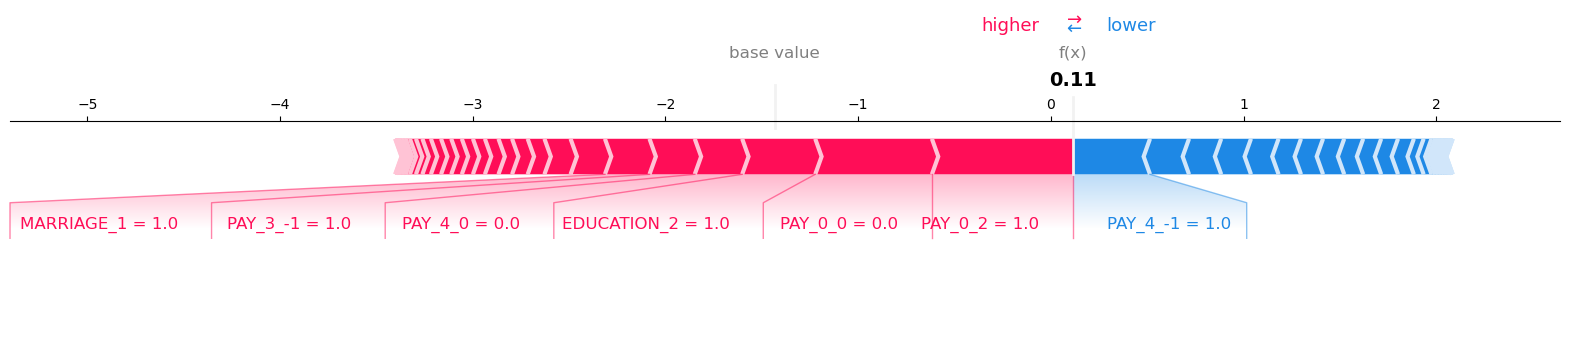

In [38]:
shap.force_plot(
    dt_explainer.expected_value,
    test_dt_shap_values[ex_one_ind, :],
    X_test_ct.iloc[ex_one_ind, :],
    matplotlib=True,
)

### *Comment*

Based on the SHAP force analysis, we can observe the influential factors driving the prediction. Features highlighted in red contribute to an upward shift in the predicted value, indicating a higher likelihood of being classified as class 1 (default payment). For instance, when the marriage status is 'married' (MARRIAGE = 1), it is more probable for the prediction to lean towards class 1. Conversely, features shown in blue exert a downward influence on the prediction, suggesting a lower predicted value. For example, when the repayment status in June 2005 is categorized as paying duly (PAY_4 = -1), it is more likely to result in a decrease in the predicted value, indicating a higher likelihood of being classified as class 0 (non-default payment)